# LightGBM

## Introduction to LightGBM: Theory and Mathematical Principles

**LightGBM (Light Gradient Boosting Machine)** is a highly efficient, fast, and scalable implementation of the **Gradient Boosting Decision Tree (GBDT)** algorithm, developed by Microsoft.

It is widely used for machine learning tasks such as classification, regression, ranking, and more.

---

## Key Idea

LightGBM is based on the **Gradient Boosting** framework:

- The model builds an ensemble of decision trees in a stage-wise manner.
- Each subsequent tree tries to correct the errors (residuals) made by the previous ensemble.
- The model minimizes a differentiable loss function using gradient descent in function space.

---

## Mathematical Principle

The goal is to find a model **F(x)** that minimizes a loss function **L(y, F(x))**, where **y** is the true target.

### Boosting Process:

At iteration *t*, we have the model:

$$ F_t(x) = F_{t-1}(x) + \eta \cdot h_t(x) $$

Where:

- \( F_{t-1}(x) \) is the model at iteration *t-1*
- \( h_t(x) \) is a newly trained decision tree on the residuals
- \( \eta \) is the learning rate

### Residuals (Negative Gradients):

At each iteration, we compute the pseudo-residuals:

$$ r_i^{(t)} = -\left[ \frac{\partial L(y_i, F(x_i))}{\partial F(x_i)} \right]_{F(x) = F_{t-1}(x)} $$

Then a new tree \( h_t(x) \) is trained to fit the residuals \( r_i^{(t)} \).

---

## Innovations of LightGBM

### 1️⃣ **Leaf-wise Tree Growth**

- LightGBM grows trees **leaf-wise** (best-first), rather than level-wise.
- It splits the leaf with the highest loss reduction first → deeper trees → better accuracy.

### 2️⃣ **Histogram-based Decision Tree Learning**

- Continuous features are discretized into bins (histograms), reducing memory and computational cost.

### 3️⃣ **GPU Acceleration**

- LightGBM can leverage GPU to accelerate histogram building and tree learning.

### 4️⃣ **Efficient Handling of Large Data**

- Supports out-of-core computation.
- Can handle large datasets with limited memory.

---

## Summary

**LightGBM** builds upon the classic GBDT framework but introduces major optimizations:

- **Leaf-wise tree growth** for faster convergence.
- **Histogram-based computation** for lower memory usage.
- **Support for GPU and distributed learning**.
- **Superior performance on large-scale data**.

It remains one of the most popular choices in machine learning competitions and production systems where high performance is required.

---


## LightGBM vs. XGBoost: Key Differences

Both **LightGBM** and **XGBoost** are highly optimized implementations of Gradient Boosting Decision Trees (GBDT), and are widely used in industry and data science competitions.

Here are the key differences:

- **Tree Growth Strategy**:
    - XGBoost grows trees **level-wise** (breadth-first).
    - LightGBM grows trees **leaf-wise** (best-first), which typically results in deeper trees and better accuracy but may risk overfitting on small datasets.

- **Histogram-based Learning**:
    - Both frameworks use histogram-based binning to speed up computation.
    - LightGBM implements an even more optimized version, resulting in faster training.

- **Handling of Categorical Features**:
    - LightGBM natively supports categorical features without one-hot encoding.
    - XGBoost requires manual encoding (e.g., one-hot or label encoding).

- **Parallelization**:
    - XGBoost parallelizes tree construction level-by-level.
    - LightGBM parallelizes across features (feature-wise histogram construction), offering better scalability.

- **Memory Usage**:
    - LightGBM is typically more memory-efficient on large datasets.

LightGBM is usually faster and more scalable, while XGBoost provides more mature handling of small datasets and slightly more stable behavior out-of-the-box.


## Common LightGBM Hyperparameters to Tune

Here are some key hyperparameters to consider when training a LightGBM model:

- **learning_rate** (default = 0.1):
    - Controls the contribution of each tree.
    - Lower values improve generalization but require more trees.

- **num_leaves** (default = 31):
    - Controls the complexity of individual trees.
    - Larger values can improve accuracy but risk overfitting.

- **max_depth**:
    - Limits the depth of the tree.
    - Use to control overfitting, especially with large num_leaves.

- **min_data_in_leaf** (default = 20):
    - Minimum number of samples per leaf.
    - Increasing this value can reduce overfitting.

- **feature_fraction** (default = 1.0):
    - Fraction of features used for building each tree.
    - Acts as feature bagging.

- **bagging_fraction** (default = 1.0):
    - Fraction of data used for each iteration (row sampling).
    - Helps with variance reduction.

- **bagging_freq** (default = 0):
    - Frequency of performing bagging.
    - If set to 5, bagging is performed every 5 iterations.

- **lambda_l1** and **lambda_l2**:
    - L1 and L2 regularization terms on weights.
    - Help prevent overfitting.

### Tip:
Start with a low learning_rate (e.g. 0.01 or 0.05) and increase num_iterations accordingly.
Tune num_leaves, min_data_in_leaf, and regularization terms for best performance.


# 🏆 LightGBM Classification on League of Legends Dataset

## Project Overview

In this project, we will perform a practical classification task using the **League of Legends High Diamond Ranked 10-minute dataset**.

Our goal is to predict the outcome of the match (whether the blue team wins) based on in-game statistics collected within the first 10 minutes.

This project demonstrates how to build an efficient and accurate classification model using **LightGBM**, a state-of-the-art gradient boosting framework.

---

## Objectives

- Perform exploratory data analysis (EDA) on the League of Legends dataset.
- Preprocess and prepare data for modeling.
- Build and tune a **LightGBM Classifier**.
- Evaluate model performance using appropriate metrics.
- Analyze feature importance to understand key drivers of match outcomes.

---

## Dataset Description

In this project, we are using League of Legends (LoL) match data to perform scene-based prediction with LightGBM.  
League of Legends is a MOBA (Multiplayer Online Battle Arena) game developed by Riot Games in 2009. In each match, the blue and red teams battle on the same map with the goal of destroying the opponent’s towers. The objective of this project is to predict the match outcome using in-game statistics.

The dataset contains 9881 matches from the Platinum and above tiers of the ranked solo queue. The data was collected in 10-minute snapshots, including information such as kills, deaths, gold, experience, and more.  
The target variable is `blueWins`, indicating whether the blue team won the match.

### Feature Descriptions:

| Feature Name               | Description                             | Data Type  |
|----------------------------|-----------------------------------------|------------|
| WardsPlaced                | Number of wards placed                  | Integer    |
| WardsDestroyed             | Number of wards destroyed               | Integer    |
| FirstBlood                 | Whether the team got first blood        | Integer    |
| Kills                      | Number of champion kills                | Integer    |
| Deaths                     | Number of deaths                        | Integer    |
| Assists                    | Number of assists                       | Integer    |
| EliteMonsters              | Number of elite monsters killed         | Integer    |
| Dragons                    | Number of dragons killed                | Integer    |
| Heralds                    | Number of Rift Heralds killed           | Integer    |
| TowersDestroyed            | Number of towers destroyed              | Integer    |
| TotalGold                  | Total gold earned                       | Integer    |
| AvgLevel                   | Average champion level                  | Float      |
| TotalExperience            | Total experience earned                 | Integer    |
| TotalMinionsKilled         | Total number of minions killed          | Integer    |
| TotalJungleMinionsKilled   | Total number of jungle monsters killed  | Integer    |
| GoldDiff                   | Gold difference between teams           | Integer    |
| ExperienceDiff             | Experience difference between teams     | Integer    |
| CSPermMin                  | CS (Creep Score) per minute             | Float      |
| GoldPerMin                 | Gold per minute                         | Float      |
---

## Why LightGBM?

LightGBM is a highly efficient, scalable implementation of Gradient Boosted Decision Trees (GBDT). Compared to traditional GBDT or other libraries such as XGBoost, it offers:

- Faster training speed and higher efficiency.
- Lower memory usage.
- Support for large-scale datasets.
- Native handling of categorical features.
- Superior accuracy through **leaf-wise tree growth**.

---

Let's get started!

## Step 1: Import the library

In [91]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load data

In [92]:
df = pd.read_csv('data/high_diamond_ranked_10min.csv')
y = df.blueWins

## View the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [93]:
df.head()

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0  4519157822         0               28                   2               1   
1  4523371949         0               12                   1               0   
2  4521474530         0               15                   0               0   
3  4524384067         0               43                   1               0   
4  4436033771         0               75                   4               0   

   blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  ...  \
0          9           6           11                  0            0  ...   
1          5           5            5                  0            0  ...   
2          7          11            4                  1            1  ...   
3          4           5            5                  1            0  ...   
4          6           6            6                  0            0  ...   

   redTowersDestroyed  redTotalGold  redAvgLevel  redTotalExperience  \
0                   0         16567          6.8               17047   
1                   1         17620          6.8               17438   
2                   0         17285          6.8               17254   
3                   0         16478          7.0               17961   
4                   0         17404          7.0               18313   

   redTotalMinionsKilled  redTotalJungleMinionsKilled  redGoldDiff  \
0                    197                           55         -643   
1                    240                           52         2908   
2                    203                           28         1172   
3                    235                           47         1321   
4                    225                           67         1004   

   redExperienceDiff  redCSPerMin  redGoldPerMin  
0                  8         19.7         1656.7  
1               1173         24.0         1762.0  
2               1033         20.3         1728.5  
3                  7         23.5         1647.8  
4               -230         22.5         1740.4  

[5 rows x 40 columns]

In [94]:
df.tail()

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  \
9874  4527873286         1               17                   2   
9875  4527797466         1               54                   0   
9876  4527713716         0               23                   1   
9877  4527628313         0               14                   4   
9878  4523772935         1               18                   0   

      blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  \
9874               1          7           4            5                  1   
9875               0          6           4            8                  1   
9876               0          6           7            5                  0   
9877               1          2           3            3                  1   
9878               1          6           6            5                  0   

      blueDragons  ...  redTowersDestroyed  redTotalGold  redAvgLevel  \
9874            1  ...                   0         15246          6.8   
9875            1  ...                   0         15456          7.0   
9876            0  ...                   0         18319          7.4   
9877            1  ...                   0         15298          7.2   
9878            0  ...                   0         15339          6.8   

      redTotalExperience  redTotalMinionsKilled  redTotalJungleMinionsKilled  \
9874               16498                    229                           34   
9875               18367                    206                           56   
9876               19909                    261                           60   
9877               18314                    247                           40   
9878               17379                    201                           46   

      redGoldDiff  redExperienceDiff  redCSPerMin  redGoldPerMin  
9874        -2519              -2469         22.9         1524.6  
9875         -782               -888         20.6         1545.6  
9876         2416               1877         26.1         1831.9  
9877          839               1085         24.7         1529.8  
9878         -927                 58         20.1         1533.9  

[5 rows x 40 columns]

In [95]:
# Select the target variable 'blueWins' for classification
y = df.blueWins

# Count the number of occurrences of each class (0 = Blue team lost, 1 = Blue team won)
# Useful to check if the classes are balanced
y.value_counts()

blueWins
0    4949
1    4930
Name: count, dtype: int64

In [96]:
# Define columns to drop: 'gameId' (ID, not useful for modeling) and 'blueWins' (target variable)
drop_cols = ['gameId', 'blueWins']

# Prepare the feature matrix 'x' by dropping the unwanted columns from the dataframe
x = df.drop(drop_cols, axis=1)

# Display summary statistics of the feature matrix 'x'
# Useful to understand feature distributions, identify outliers, and check for scaling issues
x.describe()

blueWardsPlaced  blueWardsDestroyed  blueFirstBlood    blueKills  \
count      9879.000000         9879.000000     9879.000000  9879.000000   
mean         22.288288            2.824881        0.504808     6.183925   
std          18.019177            2.174998        0.500002     3.011028   
min           5.000000            0.000000        0.000000     0.000000   
25%          14.000000            1.000000        0.000000     4.000000   
50%          16.000000            3.000000        1.000000     6.000000   
75%          20.000000            4.000000        1.000000     8.000000   
max         250.000000           27.000000        1.000000    22.000000   

        blueDeaths  blueAssists  blueEliteMonsters  blueDragons  blueHeralds  \
count  9879.000000  9879.000000        9879.000000  9879.000000  9879.000000   
mean      6.137666     6.645106           0.549954     0.361980     0.187974   
std       2.933818     4.064520           0.625527     0.480597     0.390712   
min       0.000000     0.000000           0.000000     0.000000     0.000000   
25%       4.000000     4.000000           0.000000     0.000000     0.000000   
50%       6.000000     6.000000           0.000000     0.000000     0.000000   
75%       8.000000     9.000000           1.000000     1.000000     0.000000   
max      22.000000    29.000000           2.000000     1.000000     1.000000   

       blueTowersDestroyed  ...  redTowersDestroyed  redTotalGold  \
count          9879.000000  ...         9879.000000   9879.000000   
mean              0.051422  ...            0.043021  16489.041401   
std               0.244369  ...            0.216900   1490.888406   
min               0.000000  ...            0.000000  11212.000000   
25%               0.000000  ...            0.000000  15427.500000   
50%               0.000000  ...            0.000000  16378.000000   
75%               0.000000  ...            0.000000  17418.500000   
max               4.000000  ...            2.000000  22732.000000   

       redAvgLevel  redTotalExperience  redTotalMinionsKilled  \
count  9879.000000         9879.000000            9879.000000   
mean      6.925316        17961.730438             217.349226   
std       0.305311         1198.583912              21.911668   
min       4.800000        10465.000000             107.000000   
25%       6.800000        17209.500000             203.000000   
50%       7.000000        17974.000000             218.000000   
75%       7.200000        18764.500000             233.000000   
max       8.200000        22269.000000             289.000000   

       redTotalJungleMinionsKilled   redGoldDiff  redExperienceDiff  \
count                  9879.000000   9879.000000        9879.000000   
mean                     51.313088    -14.414111          33.620306   
std                      10.027885   2453.349179        1920.370438   
min                       4.000000 -11467.000000       -8348.000000   
25%                      44.000000  -1596.000000       -1212.000000   
50%                      51.000000    -14.000000          28.000000   
75%                      57.000000   1585.500000        1290.500000   
max                      92.000000  10830.000000        9333.000000   

       redCSPerMin  redGoldPerMin  
count  9879.000000    9879.000000  
mean     21.734923    1648.904140  
std       2.191167     149.088841  
min      10.700000    1121.200000  
25%      20.300000    1542.750000  
50%      21.800000    1637.800000  
75%      23.300000    1741.850000  
max      28.900000    2273.200000  

[8 rows x 38 columns]

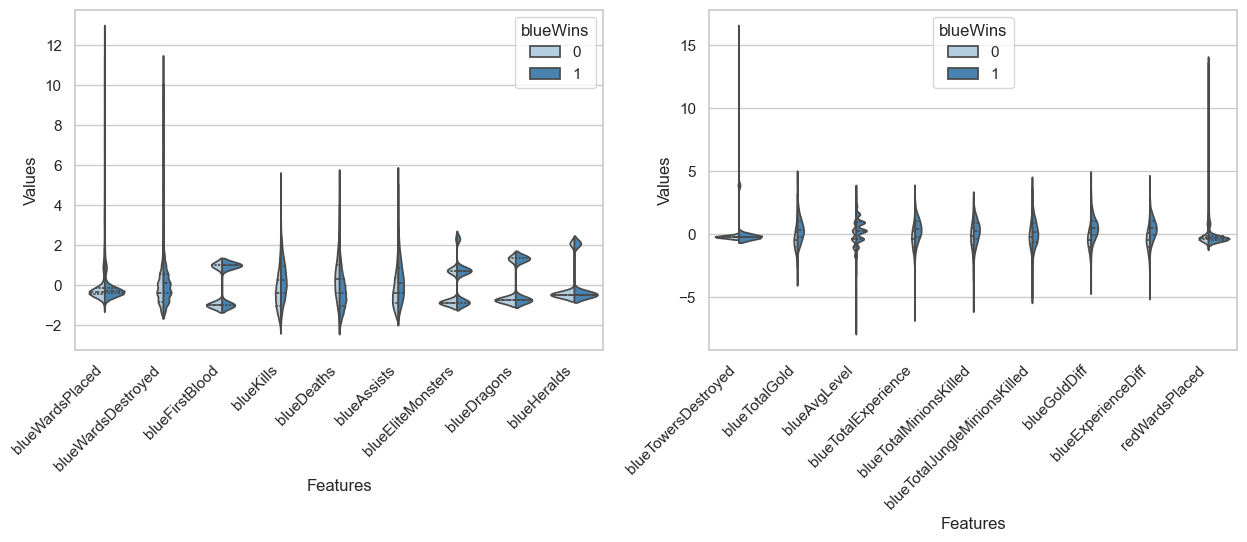

In [97]:
# Drop selected redundant or correlated features that may not add value to the model
drop_cols = ['redFirstBlood', 'redKills', 'redDeaths', 'redGoldDiff', 'redExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redCSPerMin','redGoldPerMin']
x.drop(drop_cols, axis=1, inplace=True)

# Prepare data for visualization
# Standardize features to mean=0 and std=1 for better comparison in violin plots
data = x
data_std = (data - data.mean()) / data.std()
# Visualize first 9 features with respect to blueWins outcome
data = pd.concat([y, data_std.iloc[:, 0:9]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

fig, ax = plt.subplots(1,2,figsize=(15,5))

# Plot violin plot for first 9 features
sns.violinplot(x='Features', y='Values', hue='blueWins', data=data, split=True,
               inner='quart', ax=ax[0], palette='Blues')
fig.autofmt_xdate(rotation=45)

# Visualize next set of features (features 10-18)
data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 9:18]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

sns.violinplot(x='Features', y='Values', hue='blueWins', 
               data=data, split=True, inner='quart', ax=ax[1], palette='Blues')
fig.autofmt_xdate(rotation=45)

plt.show()

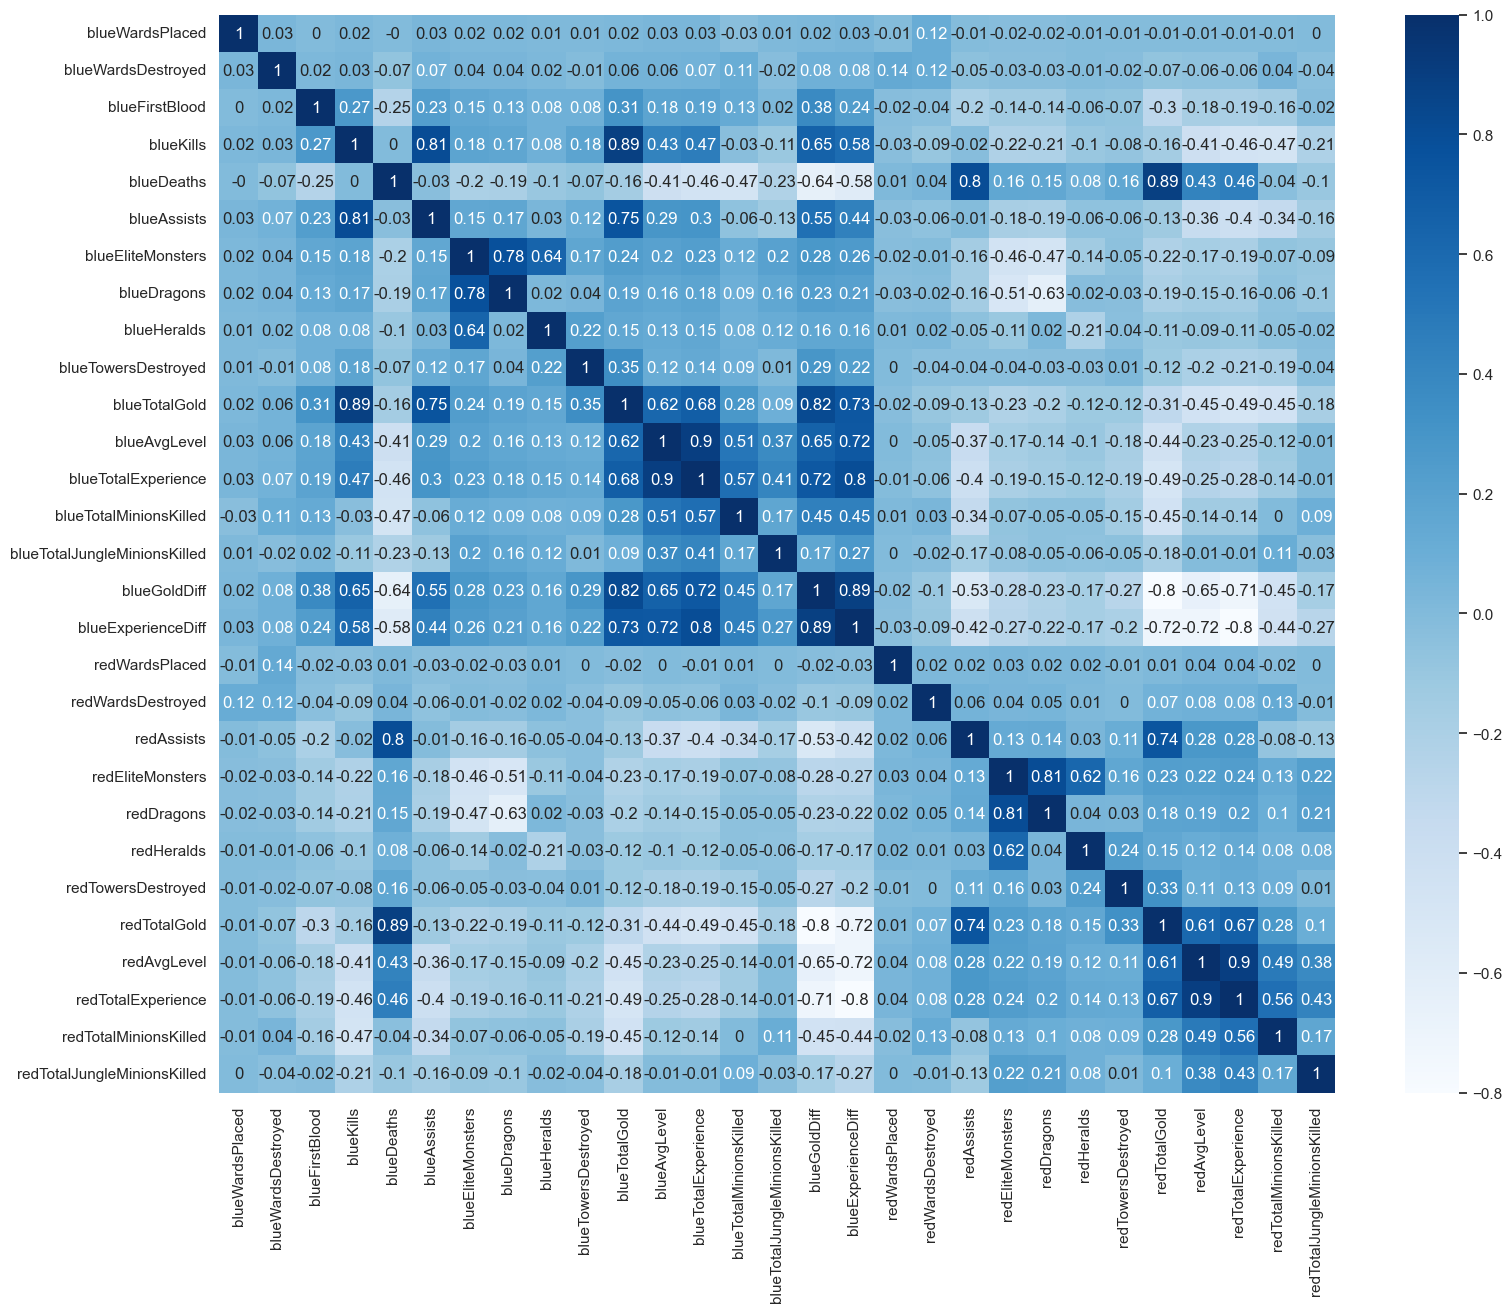

In [98]:
# Plot a heatmap to visualize the correlation matrix between features
# Useful to identify highly correlated features which may cause multicollinearity
plt.figure(figsize=(18,14))
sns.heatmap(round(x.corr(),2), cmap='Blues', annot=True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 72.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 79.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 63.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 73.8% of the points cannot be placed; you may want to decrease the size of the markers or use s

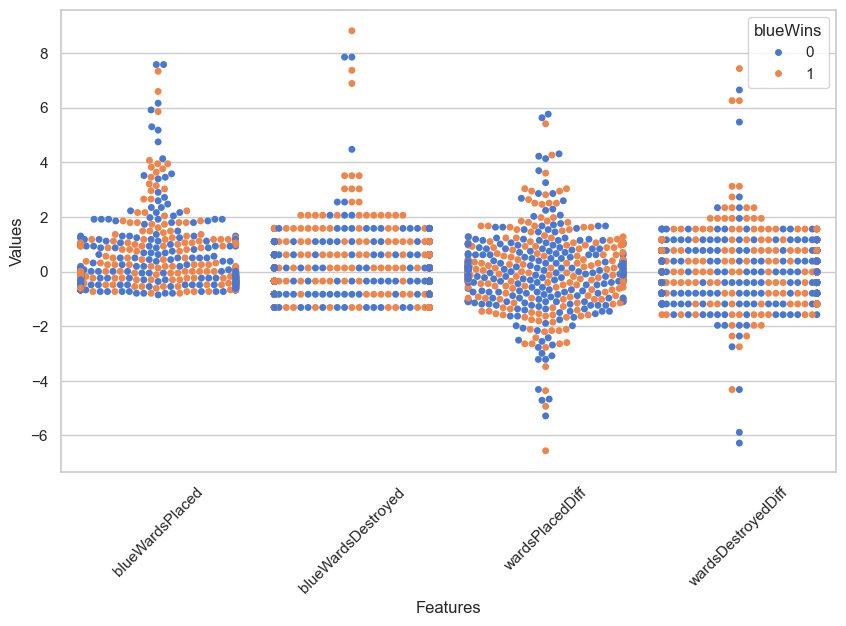

In [99]:
# Remove redundant features that may not add value to the model
drop_cols = ['redAvgLevel','blueAvgLevel']
x.drop(drop_cols, axis=1, inplace=True)

# Set Seaborn plot style
sns.set(style='whitegrid', palette='muted')

# Create two new engineered features: differences in wards placed and wards destroyed
x['wardsPlacedDiff'] = x['blueWardsPlaced'] - x['redWardsPlaced']
x['wardsDestroyedDiff'] = x['blueWardsDestroyed'] - x['redWardsDestroyed']

# Prepare a sample of data for visualization (1000 samples)
data = x[['blueWardsPlaced','blueWardsDestroyed','wardsPlacedDiff','wardsDestroyedDiff']].sample(1000)
# Standardize the selected features for better visualization
data_std = (data - data.mean()) / data.std()
# Combine target variable with standardized features
data = pd.concat([y, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

# Plot a swarm plot to visualize the distribution of selected features by blueWins outcome
plt.figure(figsize=(10,6))
sns.swarmplot(x='Features', y='Values', hue='blueWins', data=data)
plt.xticks(rotation=45)
plt.show()

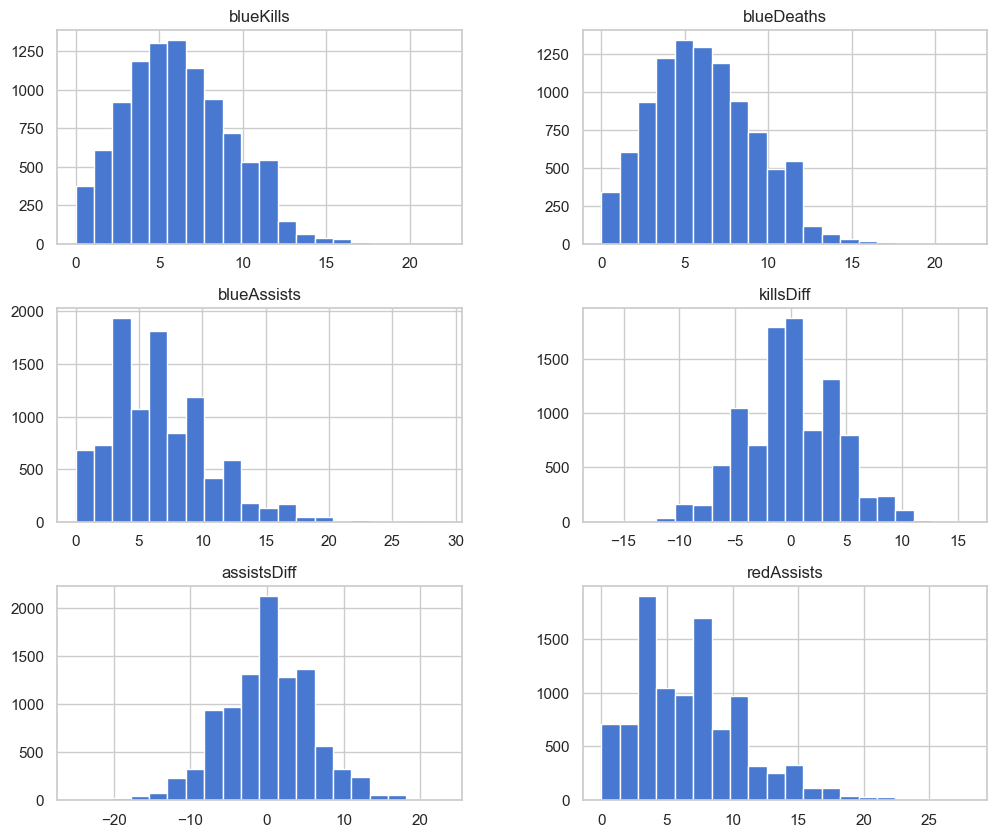

In [100]:
# Remove vision-related features to avoid redundancy and focus on combat-related features
drop_cols = ['blueWardsPlaced', 'blueWardsDestroyed', 'wardsPlacedDiff',
             'wardsDestroyedDiff', 'redWardsPlaced', 'redWardsDestroyed']
x.drop(drop_cols, axis=1, inplace=True)

# Create two new engineered features: differences in kills and assists
x['killsDiff'] = x['blueKills'] - x['blueDeaths']
x['assistsDiff'] = x['blueAssists'] - x['redAssists']

# Plot histograms to visualize the distributions of selected combat-related features
x[['blueKills', 'blueDeaths', 'blueAssists', 'killsDiff', 'assistsDiff', 'redAssists']].hist(figsize=(12, 10), bins=20)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 78.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 79.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 68.3% of the points cannot be placed; you may want to decrease the size of the markers or use s

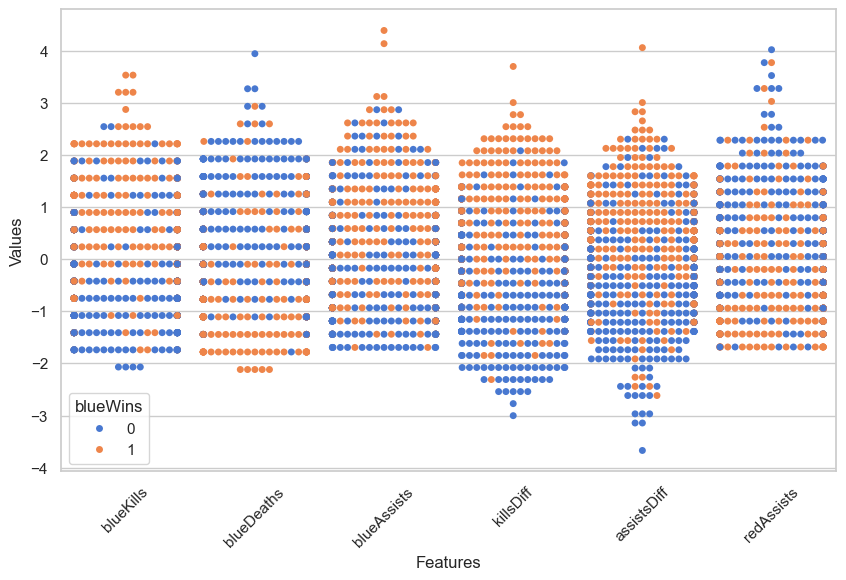

In [101]:
# Prepare selected combat features and standardize them for visualization
data = x[['blueKills', 'blueDeaths', 'blueAssists', 'killsDiff', 'assistsDiff', 'redAssists']].sample(1000)
data_std = (data - data.mean()) / data.std()

# Combine target variable with features for plotting
data = pd.concat([y, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

# Plot swarm plot to compare feature distributions by match outcome
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Features', y='Values', hue='blueWins', data=data)
plt.xticks(rotation=45)
plt.show()

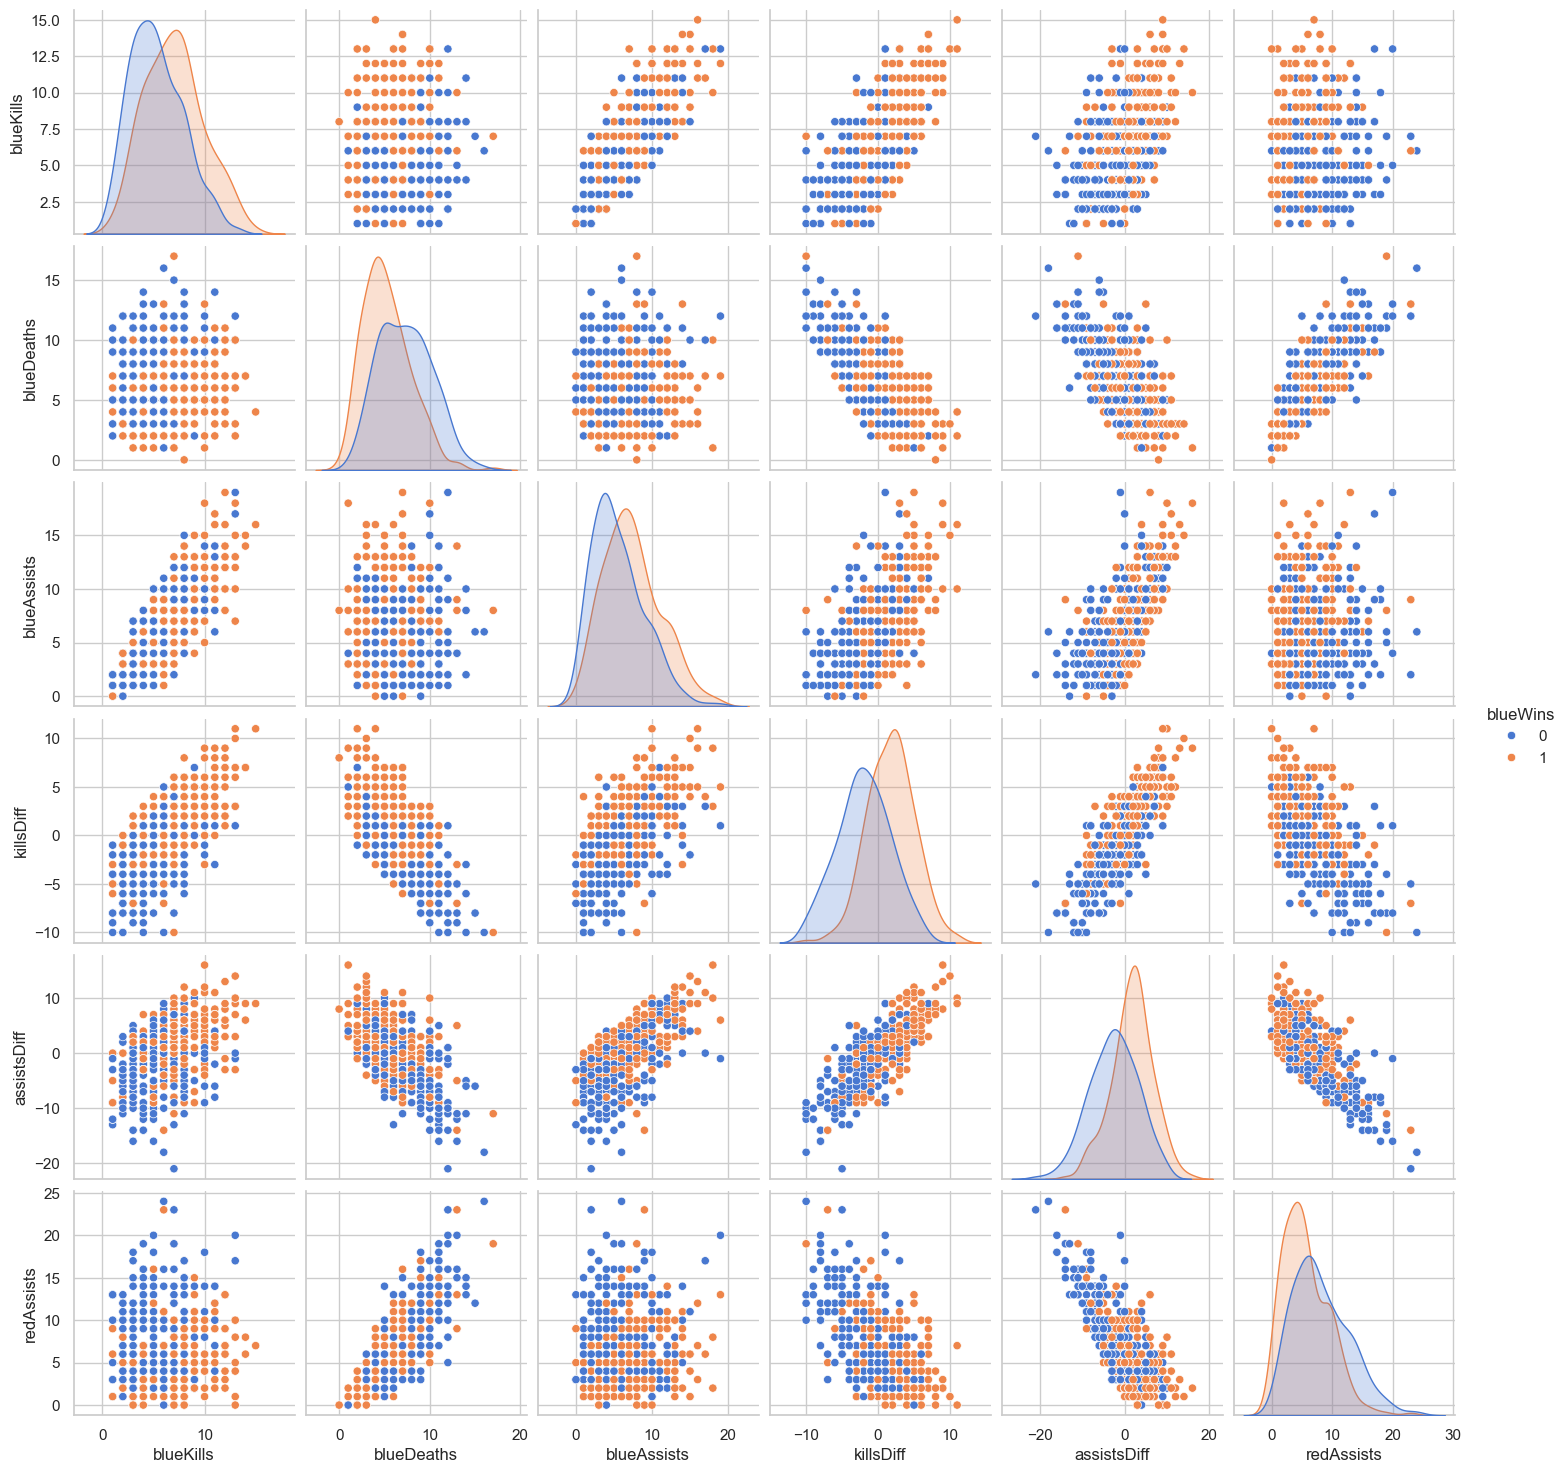

In [102]:
# Combine target variable with features and sample 500 rows for visualization
data = pd.concat([y, x], axis=1).sample(500)

# Plot pairplot to visualize pairwise relationships between selected combat features
# Colored by match outcome (blueWins)
sns.pairplot(data, vars=['blueKills', 'blueDeaths', 'blueAssists', 'killsDiff', 'assistsDiff', 'redAssists'], 
             hue='blueWins')

plt.show()

eliteDiff
-2    0.286301
-1    0.368772
 0    0.500683
 1    0.632093
 2    0.735211
Name: blueWins, dtype: float64
dragonsDiff
-1    0.374173
 0    0.500000
 1    0.640940
Name: blueWins, dtype: float64
heraldsDiff
-1    0.387729
 0    0.498680
 1    0.595046
Name: blueWins, dtype: float64


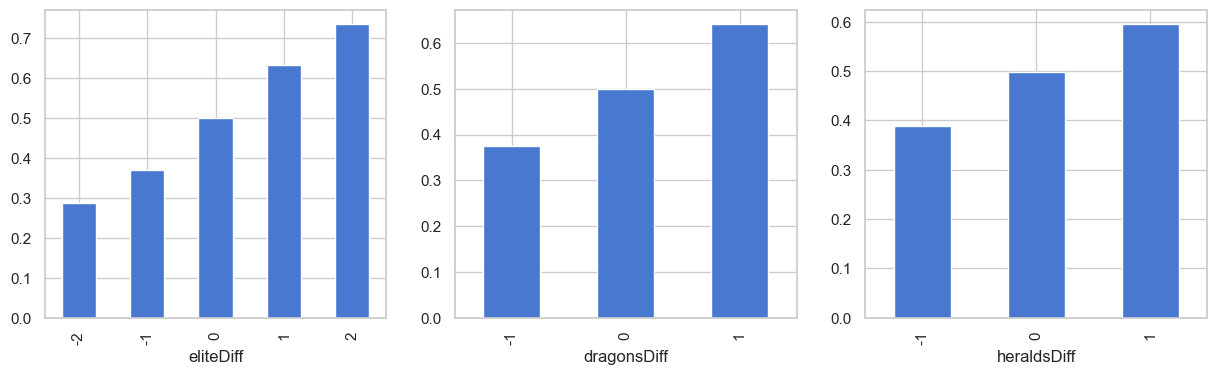

In [103]:
# Create new features representing differences in objectives between blue and red teams
x['dragonsDiff'] = x['blueDragons'] - x['redDragons']
x['heraldsDiff'] = x['blueHeralds'] - x['redHeralds']
x['eliteDiff'] = x['blueEliteMonsters'] - x['redEliteMonsters']

# Combine target variable with new features
data = pd.concat([y, x], axis=1)

# Group by objective differences and compute average win rate for blue team
eliteGroup = data.groupby(['eliteDiff'])['blueWins'].mean()
dragonGroup = data.groupby(['dragonsDiff'])['blueWins'].mean()
heraldGroup = data.groupby(['heraldsDiff'])['blueWins'].mean()

# Plot bar charts to visualize the impact of objective differences on win rate
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

eliteGroup.plot(kind='bar', ax=ax[0])
dragonGroup.plot(kind='bar', ax=ax[1])
heraldGroup.plot(kind='bar', ax=ax[2])

# Print grouped win rates for further inspection
print(eliteGroup)
print(dragonGroup)
print(heraldGroup)

plt.show()

towerDiff
-2      27
-1     347
 0    9064
 1     406
 2      28
 3       6
 4       1
Name: blueWins, dtype: int64
towerDiff
-2    0.185185
-1    0.216138
 0    0.498124
 1    0.741379
 2    0.964286
 3    1.000000
 4    1.000000
Name: blueWins, dtype: float64


Text(0, 0.5, 'Count')

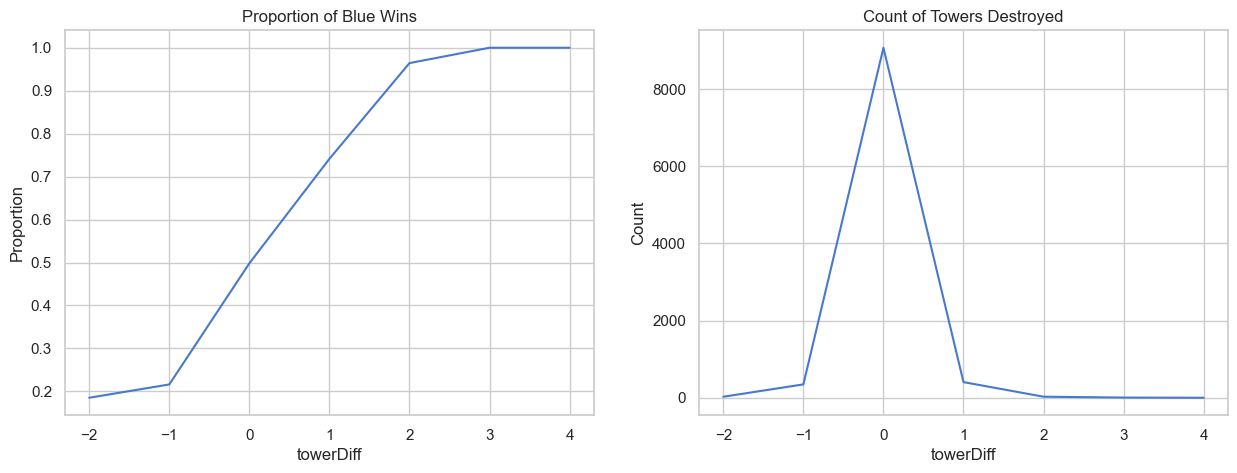

In [104]:
# Create a new feature representing the difference in towers destroyed between blue and red teams
x['towerDiff'] = x['blueTowersDestroyed'] - x['redTowersDestroyed']

# Combine target variable with the new feature
data = pd.concat([y, x], axis=1)

# Group by tower difference and compute both count and average blue win rate
towerGroup = data.groupby(['towerDiff'])['blueWins']

# Print the number of samples and the average win rate for each tower difference value
print(towerGroup.count())
print(towerGroup.mean())

# Plot line charts: one for win rate, one for sample count
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot average win rate by tower difference
towerGroup.mean().plot(kind='line', ax=ax[0])
ax[0].set_title('Proportion of Blue Wins')
ax[0].set_ylabel('Proportion')

# Plot number of samples by tower difference
towerGroup.count().plot(kind='line', ax=ax[1])
ax[1].set_title('Count of Towers Destroyed')
ax[1].set_ylabel('Count')


In [105]:
# Import the function for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Prepare features and target variable
data_target_part = y
data_features_part = x

# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(data_features_part, data_target_part, 
                                                    test_size=0.2, random_state=2020)


In [106]:
# Import the LightGBM classifier
from lightgbm.sklearn import LGBMClassifier

# Define the LightGBM classifier model with default parameters
clf = LGBMClassifier()

# Train the LightGBM model on the training set
clf.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 3917, number of negative: 3986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2132
[LightGBM] [Info] Number of data points in the train set: 7903, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495635 -> initscore=-0.017462
[LightGBM] [Info] Start training from score -0.017462


LGBMClassifier()

The accuracy of the LightGBM classifier on the training set is: 0.8447425028470201
The accuracy of the LightGBM classifier on the testing set is: 0.722165991902834
The confusion matrix result:
 [[714 300]
 [249 713]]


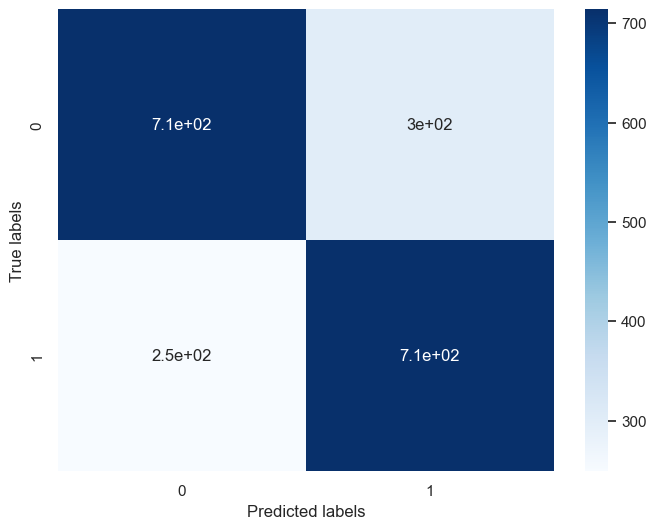

In [107]:
# Use the trained LightGBM model to make predictions on both training and testing sets
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

# Import evaluation metrics
from sklearn import metrics

# Evaluate model performance using accuracy (the proportion of correct predictions)
print('The accuracy of the LightGBM classifier on the training set is:', metrics.accuracy_score(y_train, train_predict))
print('The accuracy of the LightGBM classifier on the testing set is:', metrics.accuracy_score(y_test, test_predict))

# Compute the confusion matrix to analyze prediction results
confusion_matrix_result = metrics.confusion_matrix(test_predict, y_test)
print('The confusion matrix result:\n', confusion_matrix_result)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


<Axes: ylabel='None'>

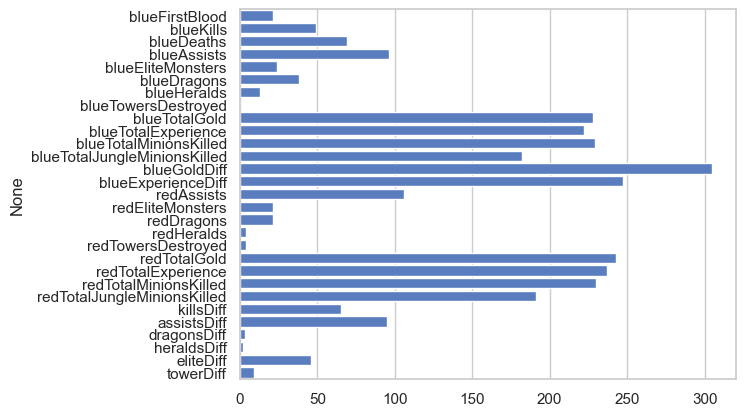

In [108]:
# Plot feature importances learned by the LightGBM model
sns.barplot(y=data_features_part.columns, x=clf.feature_importances_)

[LightGBM] [Info] Number of positive: 3917, number of negative: 3986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2132
[LightGBM] [Info] Number of data points in the train set: 7903, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495635 -> initscore=-0.017462
[LightGBM] [Info] Start training from score -0.017462


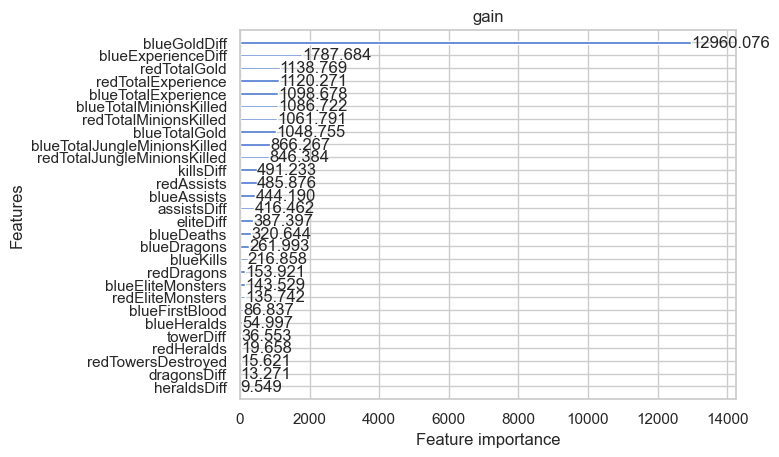

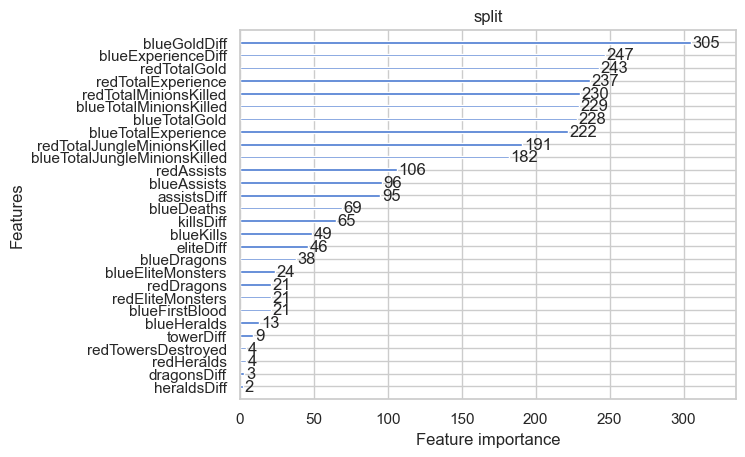

acc= 0.722165991902834


In [109]:
# Import accuracy metric and LightGBM's built-in feature importance plot function
from sklearn.metrics import accuracy_score
from lightgbm import plot_importance

# Define a function to visualize feature importance of the trained model
def estimate(model,data):

    #sns.barplot(data.columns,model.feature_importances_)
    ax1=plot_importance(model,importance_type="gain")
    ax1.set_title('gain')
    ax2=plot_importance(model, importance_type="split")
    ax2.set_title('split')
    plt.show()
    
# Define a function to train the model, make predictions, and plot feature importance
def classes(data,label,test):
    model=LGBMClassifier()
    model.fit(data,label)
    ans=model.predict(test)
    estimate(model, data)
    return ans

# Train the model and make predictions
ans=classes(x_train,y_train,x_test)
# Evaluate and print accuracy on the test set
pre=accuracy_score(y_test, ans)
print('acc=',accuracy_score(y_test,ans))

In [110]:
# Import GridSearchCV from sklearn for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search over
learning_rate = [0.1, 0.3, 0.6]
feature_fraction = [0.5, 0.8, 1]
num_leaves = [16, 32, 64]
max_depth = [-1,3,5,8]

parameters = { 'learning_rate': learning_rate,
              'feature_fraction':feature_fraction,
              'num_leaves': num_leaves,
              'max_depth': max_depth}
# Define the LightGBM model with a fixed number of estimators
model = LGBMClassifier(n_estimators = 50)

# Perform grid search with 3-fold cross-validation to find the best hyperparameters
# Use accuracy as the scoring metric
clf = GridSearchCV(model, parameters, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)

# Fit the model to the training data
clf = clf.fit(x_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Number of positive: 2611, number of negative: 2658
[LightGBM] [Info] Number of positive: 2612, number of negative: 2657
[LightGBM] [Info] Number of positive: 2611, number of n

In [111]:
# Display the best hyperparameters found by GridSearchCV
clf.best_params_

{'feature_fraction': 1, 'learning_rate': 0.1, 'max_depth': 3, 'num_leaves': 16}

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Info] Number of positive: 3917, number of negative: 3986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2132
[LightGBM] [Info] Number of data points in the train set: 7903, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495635 -> initscore=-0.017462
[LightGBM] [Info] Start training from score -0.017462
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

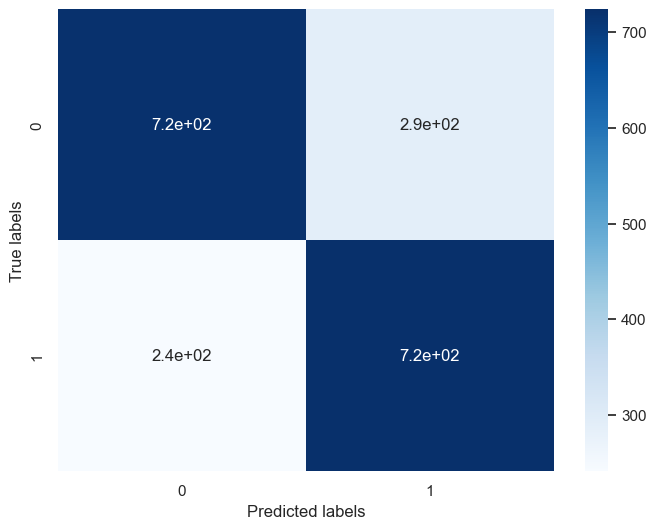

In [112]:
# Define a new LightGBM model with the best hyperparameters
clf = LGBMClassifier(
    feature_fraction=0.8,
    learning_rate=0.1,
    max_depth=3,
    num_leaves=16
)

# Train the LightGBM model on the training set
clf.fit(x_train, y_train)

# Make predictions on both training and testing sets
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

# Evaluate model performance using accuracy
print('The accuracy of the LightGBM classifier on the training set is:', metrics.accuracy_score(y_train, train_predict))
print('The accuracy of the LightGBM classifier on the testing set is:', metrics.accuracy_score(y_test, test_predict))

# Compute and display the confusion matrix
confusion_matrix_result = metrics.confusion_matrix(test_predict, y_test)
print('The confusion matrix result:\n', confusion_matrix_result)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

## LightGBM Hyperparameter Tuning Tips

### 1️⃣ Basic Parameters
- `num_leaves`: Controls the complexity of the tree. Typically set to be smaller than \(2^{max\_depth}\) to avoid overfitting.
- `min_data_in_leaf`: Minimum number of samples per leaf node. Setting this higher can prevent overfitting.
- `max_depth`: Maximum depth of the tree. For leaf-wise growth (used in LightGBM), this has less impact but can still help control tree size.

### 2️⃣ Speed-up Parameters
- Use `bagging_fraction` and `bagging_freq` to enable bagging (subsampling of data).
- Use `feature_fraction` to enable feature subsampling.
- Set a smaller `max_bin` to speed up histogram construction.
- Use `save_binary` to speed up data loading in future training.

### 3️⃣ Accuracy Improvement Parameters
- Try increasing `max_bin` (may slow down training but can improve accuracy).
- Use smaller `learning_rate` with larger `num_iterations`.
- Increase `num_leaves` carefully (can cause overfitting).
- Use more training data.
- Try different `dart` boosting mode.

### 4️⃣ Overfitting Control Parameters
- Use smaller `max_bin`.
- Use smaller `num_leaves`.
- Set higher `min_data_in_leaf` and `min_sum_hessian_in_leaf`.
- Enable bagging (`bagging_fraction` + `bagging_freq`).
- Enable feature subsampling (`feature_fraction`).
- Use stronger regularization (`lambda_l1`, `lambda_l2`, `min_gain_to_split`).
- Limit `max_depth` to avoid deep trees.

### Summary
A good starting point is to first tune:
- `num_leaves`, `min_data_in_leaf`, `feature_fraction`, `bagging_fraction`, `learning_rate`, `max_depth`.

Then add:
- Regularization (`lambda_l1`, `lambda_l2`), advanced sampling, and early stopping.

Tuning LightGBM is an iterative process — balance **accuracy**, **training time**, and **overfitting risk**.
